In [1]:
#import pip
#pip.main(["install","yfinance"])

In [2]:
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = yf.download("AApl",start="2010-01-01",end="2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [10]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.426000,352410800
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.526021,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.537303,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.433321,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.421426,477131200


In [11]:
df_new = df["Close"].to_frame()

In [12]:
df_new.head(11)

,Close
Date,
2009-12-31,7.526071
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
2010-01-11,7.503929
2010-01-12,7.418571
2010-01-13,7.523214


In [13]:
df_new["Close in 10 changes"] = df_new["Close"].shift(-10)

In [14]:
df_new.head()

,Close,Close in 10 changes
Date,,
2009-12-31,7.526071,7.354643
2010-01-04,7.643214,7.680000
2010-01-05,7.656429,7.561786
2010-01-06,7.534643,7.431071
2010-01-07,7.520714,7.062500


In [15]:
df_new.tail(20)

,Close,Close in 10 changes
Date,,
2019-12-02,66.040001,69.964996
2019-12-03,64.862503,70.102501
2019-12-04,65.434998,69.934998
2019-12-05,66.394997,70.004997
2019-12-06,67.677498,69.860001
2019-12-09,66.730003,71.000000
2019-12-10,67.120003,71.067497
2019-12-11,67.692497,72.477501
2019-12-12,67.864998,72.449997


In [16]:
dfc = df_new.iloc[:-10,:]

In [17]:
dfc.tail()

,Close,Close in 10 changes
Date,,
2019-12-09,66.730003,71.000000
2019-12-10,67.120003,71.067497
2019-12-11,67.692497,72.477501
2019-12-12,67.864998,72.449997
2019-12-13,68.787498,72.879997


In [18]:
x = dfc["Close"].values.reshape(dfc.shape[0],1)
y = dfc["Close in 10 changes"].values

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
rf = RandomForestRegressor(n_estimators=500)

In [21]:
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=500)

In [22]:
y_pred = rf.predict(x_test)

In [23]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.7755060335391655

In [24]:
y_act_10 = dfc.iloc[-10:,:]["Close in 10 changes"].values

In [25]:
y_pred_10 = rf.predict(dfc.iloc[-10:,:]["Close"].values.reshape(10,1))

In [26]:
y_act_10

array([69.96499634, 70.10250092, 69.93499756, 70.00499725, 69.86000061,
       71.        , 71.06749725, 72.47750092, 72.44999695, 72.87999725])

In [27]:
y_pred_10

array([67.38151776, 68.57589119, 66.66733224, 67.56843874, 70.67699524,
       69.18029048, 69.86523772, 71.65594035, 72.11568327, 72.61040262])

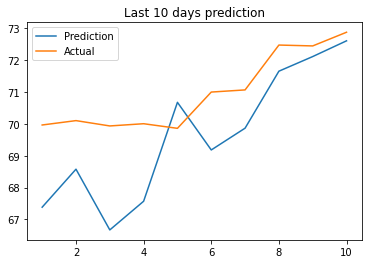

In [28]:
plt.plot(range(1,11),y_pred_10)
plt.plot(range(1,11),y_act_10)
plt.title("Last 10 days prediction")
plt.legend(["Prediction","Actual"])
plt.show()